# Actividad 2: Analisis  Exploratorio de Datos para "Todo ventas en Línea, S.A. de C.V."

En este ejercicio generaremos de manera aleatoria un dataset con al menos 10 columnas y 5000 registros que cumplan con los siguientes requisitos:
- 4 columnas **numericas** (Sale_Amount, Quantity, Discount, Profit)
- 2 columnas **categoricas** (Product_Category, Region)
- 2 columnas **estructuradas** (Order_Date, Customer_ID)
- 2 columnas **no estructuradas** (Product_Description, Customer_Review)

Y se responderan las siguientes preguntas:
- ¿Cual es el volumen de ventas y rentabilidad de cada producto?
- ¿Que regiones o nichos muestran mejores resultados?
- ¿Como se comporta la distrubicion de ventas y cuales son los outliers?
- Que patrones se pueden identificar en las fechas de los pedidos?

In [1]:
#impotacion de las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

#configuracion de los graficos
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
# Generacion aleatoria del dataset
#establecer una semilla
np.random.seed(42)
random.seed(42)

#numero de registros
n_registros = 5000

#Generacion de columnas numericas
#Sale_amount: valor entre 10 y 1000 (float)
sale_amount = np.round(np.random.uniform(10, 1000, n_registros), 2)

#Quantity: valor entre 1 y 20
quantity = np.random.randint(1, 20, n_registros)

#Discount: valor entre 0 y 0.5 (float)
discount = np.round(np.random.uniform(0, 0.5, n_registros), 2)

#Profit: Se genera como una fraccion del sale_amount (aleatoria)
profit = np.round(sale_amount * np.random.uniform(0.05, 0.3, n_registros), 2)

In [3]:
# COlumnas categoricas
categories = ['Electronics', 'Clothing', 'Furniture', 'Books', 'Toys']
product_category = [random.choice(categories) for _ in range(n_registros)]
regions = ['North', 'South', 'East', 'West']
region = [random.choice(regions) for _ in range(n_registros)]

In [4]:
# columnas NO estructuradas
#Product_Description: texto libre
descriptions = [
    "Producto de alta calidad",
    "Articulo novedoso y en tendencia",
    "Excelente para regalo",
    "Diseño exclusivo y moderno",
    "Alta durabilidad"
]
product_description = [random.choice(descriptions) for _ in range(n_registros)]

#Customer Review: Texto libre, comentarios cortos
reviews = [
    "Excelente compra",
    "Satisfecho con mi producto",
    "Muy rapido el envio",
    "No duro nada",
    "Se rompio muy rapido"
    "No cumplio con las expectativas",
    "Calidad insuperable"
]
customer_review = [random.choice(reviews) for _ in range(n_registros)]

In [5]:
# Columnas Estructuradas
# Order Date: fechas aleatorias entre 1/01/2024 y el 31/12/2024
start_date = datetime(2024,1,1)
order_date = [start_date + timedelta(days=np.random.randint(0,365)) for _ in range(n_registros)]

#Customer ID: con formato CUST-XXXX (numero de 4 digitos)
customer_id = [f"CUST-{np.random.randint(1000, 9999)}" for _ in range(n_registros)]

In [6]:
#Crear el DataFrame con todas las columnas
data = {
    "Sale_Amount": sale_amount,
    "Quantity": quantity,
    "Discount": discount,
    "Profit": profit,
    "Product_Category": product_category,
    "Region": region,
    "Order_Date": order_date,
    "Customer_ID": customer_id,
    "Product_Description": product_description,
    "Customer_Review": customer_review
}
df_sales = pd.DataFrame(data)
print("El dataset generado con exito. Numero de registros: ", n_registros)
df_sales.head()

El dataset generado con exito. Numero de registros:  5000


,Sale_Amount,Quantity,Discount,Profit,Product_Category,Region,Order_Date,Customer_ID,Product_Description,Customer_Review
0,380.79,19,0.35,44.41,Electronics,North,2024-04-17,CUST-9981,Diseño exclusivo y moderno,Satisfecho con mi producto
1,951.21,8,0.46,143.68,Electronics,South,2024-02-04,CUST-8875,Producto de alta calidad,Se rompio muy rapidoNo cumplio con las expecta...
2,734.67,7,0.19,165.64,Furniture,West,2024-12-24,CUST-7268,Producto de alta calidad,Excelente compra
3,602.67,16,0.12,35.98,Clothing,East,2024-02-13,CUST-7812,Articulo novedoso y en tendencia,Satisfecho con mi producto
4,164.46,19,0.28,47.58,Clothing,East,2024-05-22,CUST-6479,Articulo novedoso y en tendencia,Satisfecho con mi producto


In [7]:
# Guardar el Dataset en formato CSV
csv_filename = "ventas_todo_ventas_en_linea.csv"
df_sales.to_csv(csv_filename, index=False, encoding='utf-8')
print(f"Dataset guardado con el nombre: {csv_filename}")

Dataset guardado con el nombre: ventas_todo_ventas_en_linea.csv


# Exploracion inicial de los Datos

En esta seccion se explorará la estructura, calidad y caracteristicas de los datos para identificar posibles problemas con los valores faltantes o atipicos, y para comprender la distribucion de las variables

In [8]:
#CArgar los datos desde el CSV
df = pd.read_csv(csv_filename, parse_dates=['Order_Date'])
print("Datos cargados correctamente")
df.head(10)

Datos cargados correctamente


,Sale_Amount,Quantity,Discount,Profit,Product_Category,Region,Order_Date,Customer_ID,Product_Description,Customer_Review
0,380.79,19,0.35,44.41,Electronics,North,2024-04-17,CUST-9981,Diseño exclusivo y moderno,Satisfecho con mi producto
1,951.21,8,0.46,143.68,Electronics,South,2024-02-04,CUST-8875,Producto de alta calidad,Se rompio muy rapidoNo cumplio con las expecta...
2,734.67,7,0.19,165.64,Furniture,West,2024-12-24,CUST-7268,Producto de alta calidad,Excelente compra
3,602.67,16,0.12,35.98,Clothing,East,2024-02-13,CUST-7812,Articulo novedoso y en tendencia,Satisfecho con mi producto
4,164.46,19,0.28,47.58,Clothing,East,2024-05-22,CUST-6479,Articulo novedoso y en tendencia,Satisfecho con mi producto
5,164.43,6,0.40,10.12,Clothing,West,2024-07-29,CUST-9694,Articulo novedoso y en tendencia,Se rompio muy rapidoNo cumplio con las expecta...
6,67.50,11,0.00,18.25,Electronics,East,2024-10-11,CUST-1172,Articulo novedoso y en tendencia,No duro nada
7,867.51,5,0.32,237.35,Toys,East,2024-01-06,CUST-1886,Alta durabilidad,Excelente compra
8,605.10,16,0.30,109.60,Electronics,West,2024-08-05,CUST-7263,Alta durabilidad,Muy rapido el envio
9,710.99,7,0.16,59.90,Toys,South,2024-01-27,CUST-5368,Alta durabilidad,Calidad insuperable


In [9]:
# Analisis de la estructura y calidad del dataset
# Dimensiones del dataset
print("Dimensiones del DataFrame: ", df.shape)

#Listado de las columnas y su tipo
print("\nColumnas y tipos de datos")
print(df.dtypes)

#REvisado de valores nulos
print("\nValores nulos: ", df.isnull().sum())

Dimensiones del DataFrame:  (5000, 10)

Columnas y tipos de datos
Sale_Amount                   float64
Quantity                        int64
Discount                      float64
Profit                        float64
Product_Category               object
Region                         object
Order_Date             datetime64[ns]
Customer_ID                    object
Product_Description            object
Customer_Review                object
dtype: object

Valores nulos:  Sale_Amount            0
Quantity               0
Discount               0
Profit                 0
Product_Category       0
Region                 0
Order_Date             0
Customer_ID            0
Product_Description    0
Customer_Review        0
dtype: int64


# Estadistica Descriptiva

Se obtendran las siguientes medidas de tendencia central
- Media
- Moda
- Mediana

Medidas de Dispersion
- Varianza
- Desviacion estandar

con el fin de conocer la distribucion de variables numericas

In [10]:
#Estadisticas descriptivas de columnas numericas
numeric_cols = ['Sale_Amount', 'Quantity', 'Discount', 'Profit']

#DEscripcion general
desc = df[numeric_cols].describe()
print("Estadisticas descriptivas: ", desc)

Estadisticas descriptivas:         Sale_Amount     Quantity    Discount       Profit
count  5000.000000  5000.000000  5000.00000  5000.000000
mean    501.863698    10.071600     0.24936    87.602970
std     286.737332     5.477597     0.14379    65.134705
min      10.010000     1.000000     0.00000     0.610000
25%     251.425000     5.000000     0.13000    35.347500
50%     505.010000    10.000000     0.25000    73.145000
75%     750.617500    15.000000     0.37000   127.292500
max     999.720000    19.000000     0.50000   296.440000


# Visualizacion de Datos

Se crearan diferentes graficas para visualizar y comprender mejor la distribucion y relacion entre las variables del dataset 

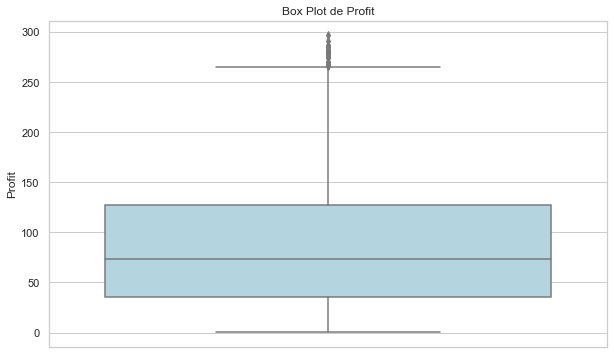

In [15]:
# Diagramas de cajas (Box Plot) para 'Profit'

plt.figure(figsize=(10,6))
sns.boxplot(y=df['Profit'], color='lightblue')
plt.title("Box Plot de Profit")
plt.ylabel("Profit")
plt.show()

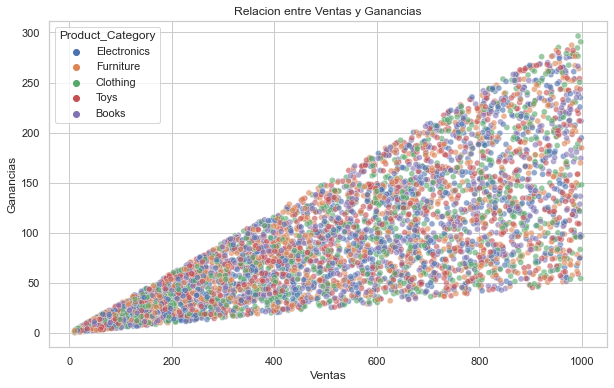

In [17]:
# Grafica de Dispersion (ScatterPlot) entre Sales_Amount y Profit
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sale_Amount', y='Profit',
                hue='Product_Category', alpha=0.6)
plt.title("Relacion entre Ventas y Ganancias")
plt.xlabel("Ventas")
plt.ylabel("Ganancias")
plt.show()

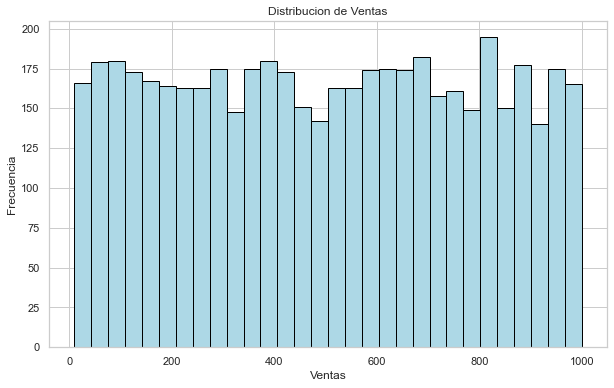

In [23]:
# Histograma de Ventas
plt.figure(figsize=(10,6))
plt.hist(df['Sale_Amount'], bins=30, color='lightblue', edgecolor='black')
plt.title("Distribucion de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

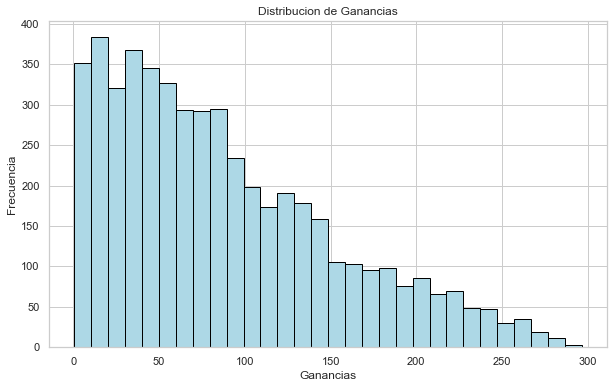

In [24]:
# Histograma de Ganancias
plt.figure(figsize=(10,6))
plt.hist(df['Profit'], bins=30, color='lightblue', edgecolor='black')
plt.title("Distribucion de Ganancias")
plt.xlabel("Ganancias")
plt.ylabel("Frecuencia")
plt.show()

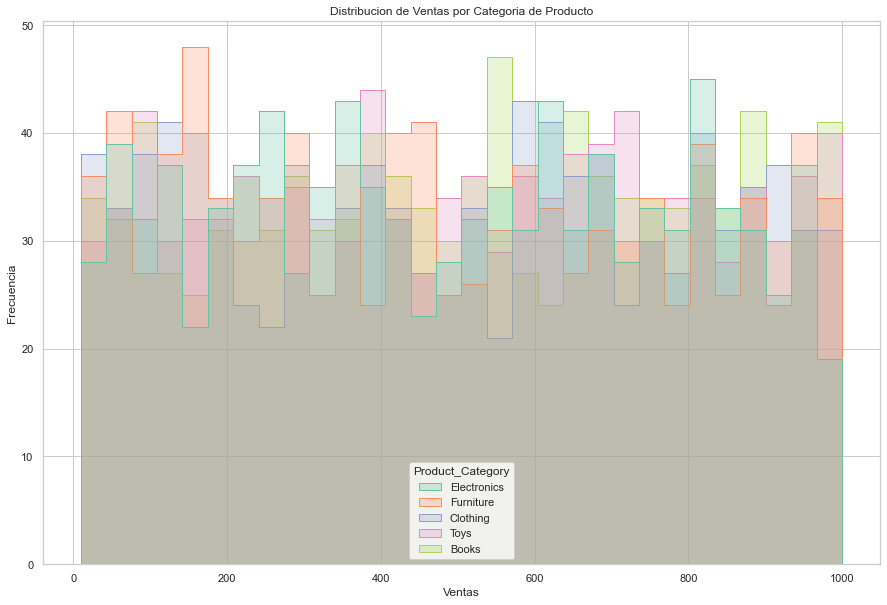

In [41]:
#Histograma con distincion segun la categoria con respecto a las ventas.
plt.figure(figsize=(15,10))
ax = sns.histplot(data=df, x='Sale_Amount', hue='Product_Category', bins=30, 
        palette="Set2", element='step', stat='count')
plt.title("Distribucion de Ventas por Categoria de Producto")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
# Orient the legend
sns.move_legend(ax, "lower center")
plt.show()

# Interpretacion

- **BoxPlot** de Profit
    Permite visualizar la mediana, el rango intercuatil y detectar outliers (datos atipicos) en la ganancia. Si se identifican valores atipicos se tiene que evaluar si son errores de captura o eventos reales.
- **ScatterPlot** de ventas vs ganancias:
    Muestra la relacion entre el monto de la venta y la ganancia, segmentado por categoria de producto. Esto ayuda a identificar tendencias y patrones, por ejemplo, productos en altos montos de venta pero baja ganancia.
- **Histograma** de ventas
    Facilita la visualizacion de la distribucion de los montos de ventas. Se pueden detectar concentraciones ed ventas en ciertos rangos y evaluar la existencia de sesgos.